In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("BNG_cleveland.csv")
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,13]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(k=13)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(13,'Score'))  #print 10 best features

       Specs         Score
12      thal  93817.115906
11        ca  90604.415194
9    oldpeak  63438.441116
8      exang  59489.340993
7    thalach  49195.239725
2         cp  47445.553561
10     slope  37450.224407
1        sex  19408.927571
0        age  14421.325188
6    restecg  11065.853589
5        fbs   6237.997966
3   trestbps   4361.348080
4       chol   2817.190682


C:\Users\Ammar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.12841426 0.01667103 0.05409427 0.11910382 0.11868075 0.01023187
 0.01668483 0.14347532 0.0627859  0.12314439 0.03709361 0.07336889
 0.09625106]


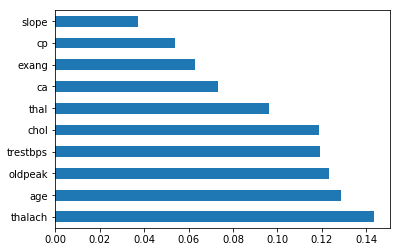

In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv("BNG_cleveland.csv")
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

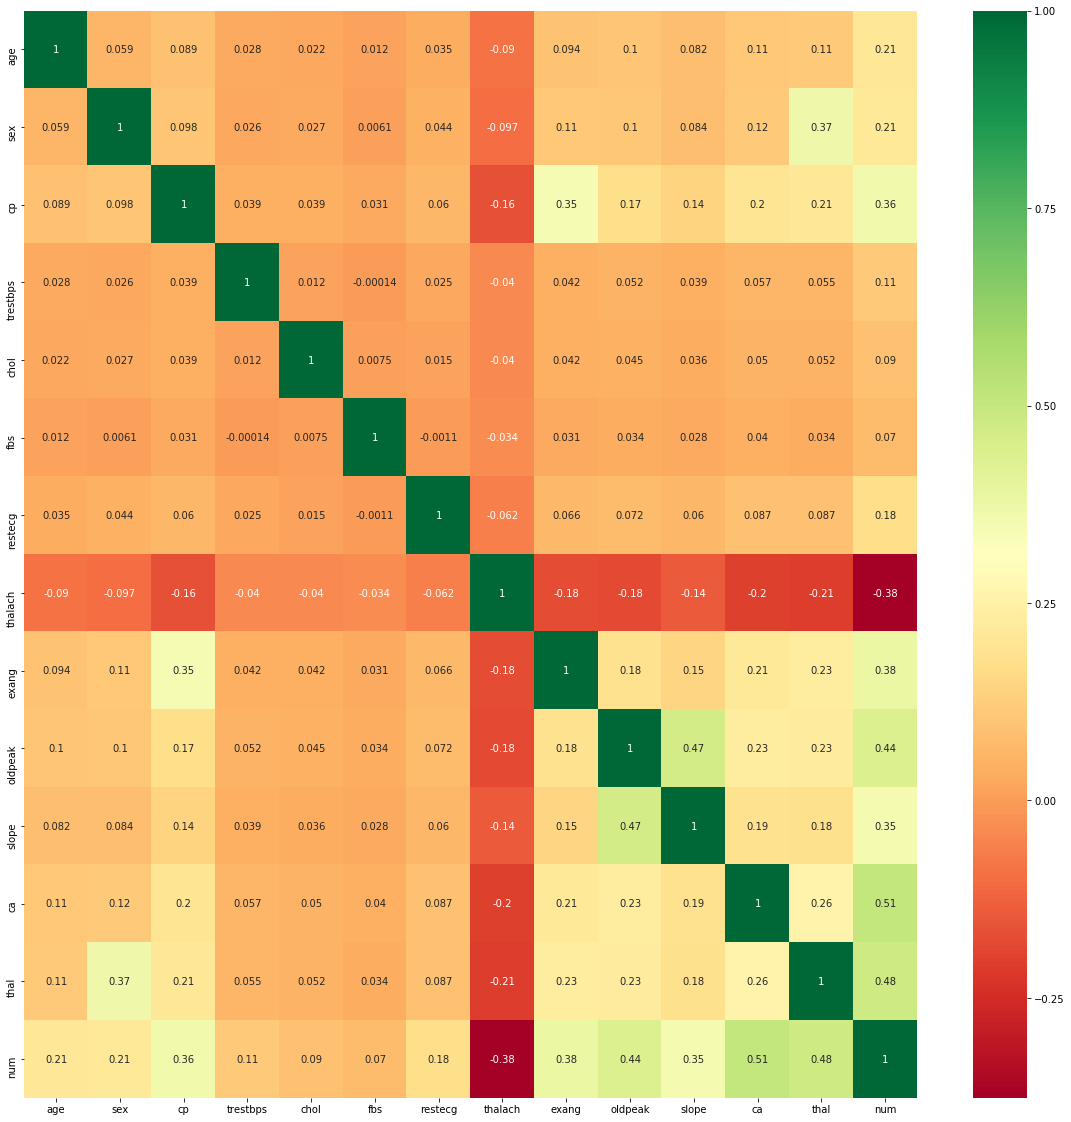

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("BNG_cleveland.csv")
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

C:\Users\Ammar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ammar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


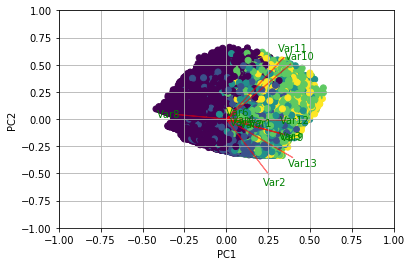

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("BNG_cleveland.csv")
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]  
#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [29]:
print(pca.explained_variance_ratio_)

[0.19129748 0.08728417 0.08077489 0.07739897 0.07625487 0.07569649
 0.07462013 0.07333976 0.06691319 0.06013073 0.05030054 0.04534059
 0.04064821]


In [25]:
print(abs( pca.components_ ))

[[1.78846144e-01 2.52841690e-01 3.32071292e-01 8.82292383e-02
  8.21828725e-02 5.79959299e-02 1.31811221e-01 3.00046589e-01
  3.47532039e-01 3.83438418e-01 3.44027985e-01 3.55121479e-01
  3.95271591e-01]
 [3.42653099e-02 5.06211976e-01 1.33909971e-01 1.71966004e-03
  2.39537776e-02 5.54097882e-02 3.90327066e-02 4.30113596e-02
  1.42933559e-01 5.04232452e-01 5.64772018e-01 9.27498352e-03
  3.51978840e-01]
 [7.40609083e-02 5.24670817e-01 4.90825547e-01 3.79683018e-03
  3.95828241e-02 2.21550250e-01 2.28449380e-02 1.27640185e-01
  4.58112638e-01 2.08819723e-01 2.45039621e-01 8.28432226e-02
  3.00775464e-01]
 [1.23668807e-01 1.56548841e-01 8.37144789e-03 5.77407461e-01
  6.68118562e-02 6.54402450e-01 4.22146070e-01 4.71207388e-03
  1.02551452e-02 4.11921428e-02 5.49428060e-02 3.43936062e-02
  9.89420964e-02]
 [1.39887249e-02 1.23056719e-02 1.35482925e-01 2.26249258e-01
  9.12187600e-01 2.77644886e-01 3.65421891e-02 1.44665528e-02
  1.28802668e-01 2.92754810e-02 4.01287645e-02 1.78618763e-0